<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/Complexity_learning_curve_Hastie_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p></p>
<p style="font-size:35px;text-align:center;color:blue">Complexity and learning curve analysis for classification</p>
<p style="font-size:25px;text-align:center;color:red">(Using Synthetic data set)</p>
<p style="font-size:20px;text-align:center">Dr. Tirthajyoti Sarkar, Sunnyvale, CA</p>

## Synthetic data set from scikit-learn
<p style="font-size:16px;font-family:cambria">
Now we turn to the 2nd dataset for this assignment. In the loan data dataset, we did not observe a markedly improved performance with Boosting algorithm over the single decision tree. Therefore, we choose to use a synthetic dataset to clearly demonstrate this advantage. We use <mark><span style="font-family:consolas">datasets.make_hastie_10_2</span></mark> method from scikit-learn to generate <b>12,000 samples with 10 feature variables and a binary class variable</b>.
<p style="font-size:16px;font-family:cambria">
Apart from pairwise scatter plots, to illustrate the class separation, we show boxplots grouped by response classes. It is clear from these plots that there is lot of overlap between classes for every individual feature. Therefore, it is be expected that a single feature or a single decision tree may not be an effective classifier but an ensemble meta-learner could prove to be effective.
</p>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
from sklearn import datasets

## Make the dataset and basic operations

In [3]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

In [4]:
df=pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,11)])
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,-2.301539,1.744812,-0.761207,0.319039,-0.249370
1,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-1.099891,-0.172428,-0.877858,0.042214,0.582815
2,-1.100619,1.144724,0.901591,0.502494,0.900856,-0.683728,-0.122890,-0.935769,-0.267888,0.530355
3,-0.691661,-0.396754,-0.687173,-0.845206,-0.671246,-0.012665,-1.117310,0.234416,1.659802,0.742044
4,-0.191836,-0.887629,-0.747158,1.692455,0.050808,-0.636996,0.190915,2.100255,0.120159,0.617203
5,0.300170,-0.352250,-1.142518,-0.349343,-0.208894,0.586623,0.838983,0.931102,0.285587,0.885141
6,-0.754398,1.252868,0.512930,-0.298093,0.488518,-0.075572,1.131629,1.519817,2.185575,-1.396496
7,-1.444114,-0.504466,0.160037,0.876169,0.315635,-2.022201,-0.306204,0.827975,0.230095,0.762011
8,-0.222328,-0.200758,0.186561,0.410052,0.198300,0.119009,-0.670662,0.377564,0.121821,1.129484
9,1.198918,0.185156,-0.375285,-0.638730,0.423494,0.077340,-0.343854,0.043597,-0.620001,0.698032


In [5]:
df['y']=pd.Series(y)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,-2.301539,1.744812,-0.761207,0.319039,-0.249370,1.0
1,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-1.099891,-0.172428,-0.877858,0.042214,0.582815,1.0
2,-1.100619,1.144724,0.901591,0.502494,0.900856,-0.683728,-0.122890,-0.935769,-0.267888,0.530355,-1.0
3,-0.691661,-0.396754,-0.687173,-0.845206,-0.671246,-0.012665,-1.117310,0.234416,1.659802,0.742044,-1.0
4,-0.191836,-0.887629,-0.747158,1.692455,0.050808,-0.636996,0.190915,2.100255,0.120159,0.617203,1.0


## Basic visualizations
<p style="font-size:16px;font-family:cambria">
We plot histograms, boxlots and scatterplots of the dataset and observe that <b>the class separation is not very obvious</b>. Particularly, boxplots show lot of overlap between features for two output classes.
<br><br>
So, <b>this should be a non-trivial classification task</b>.</p>

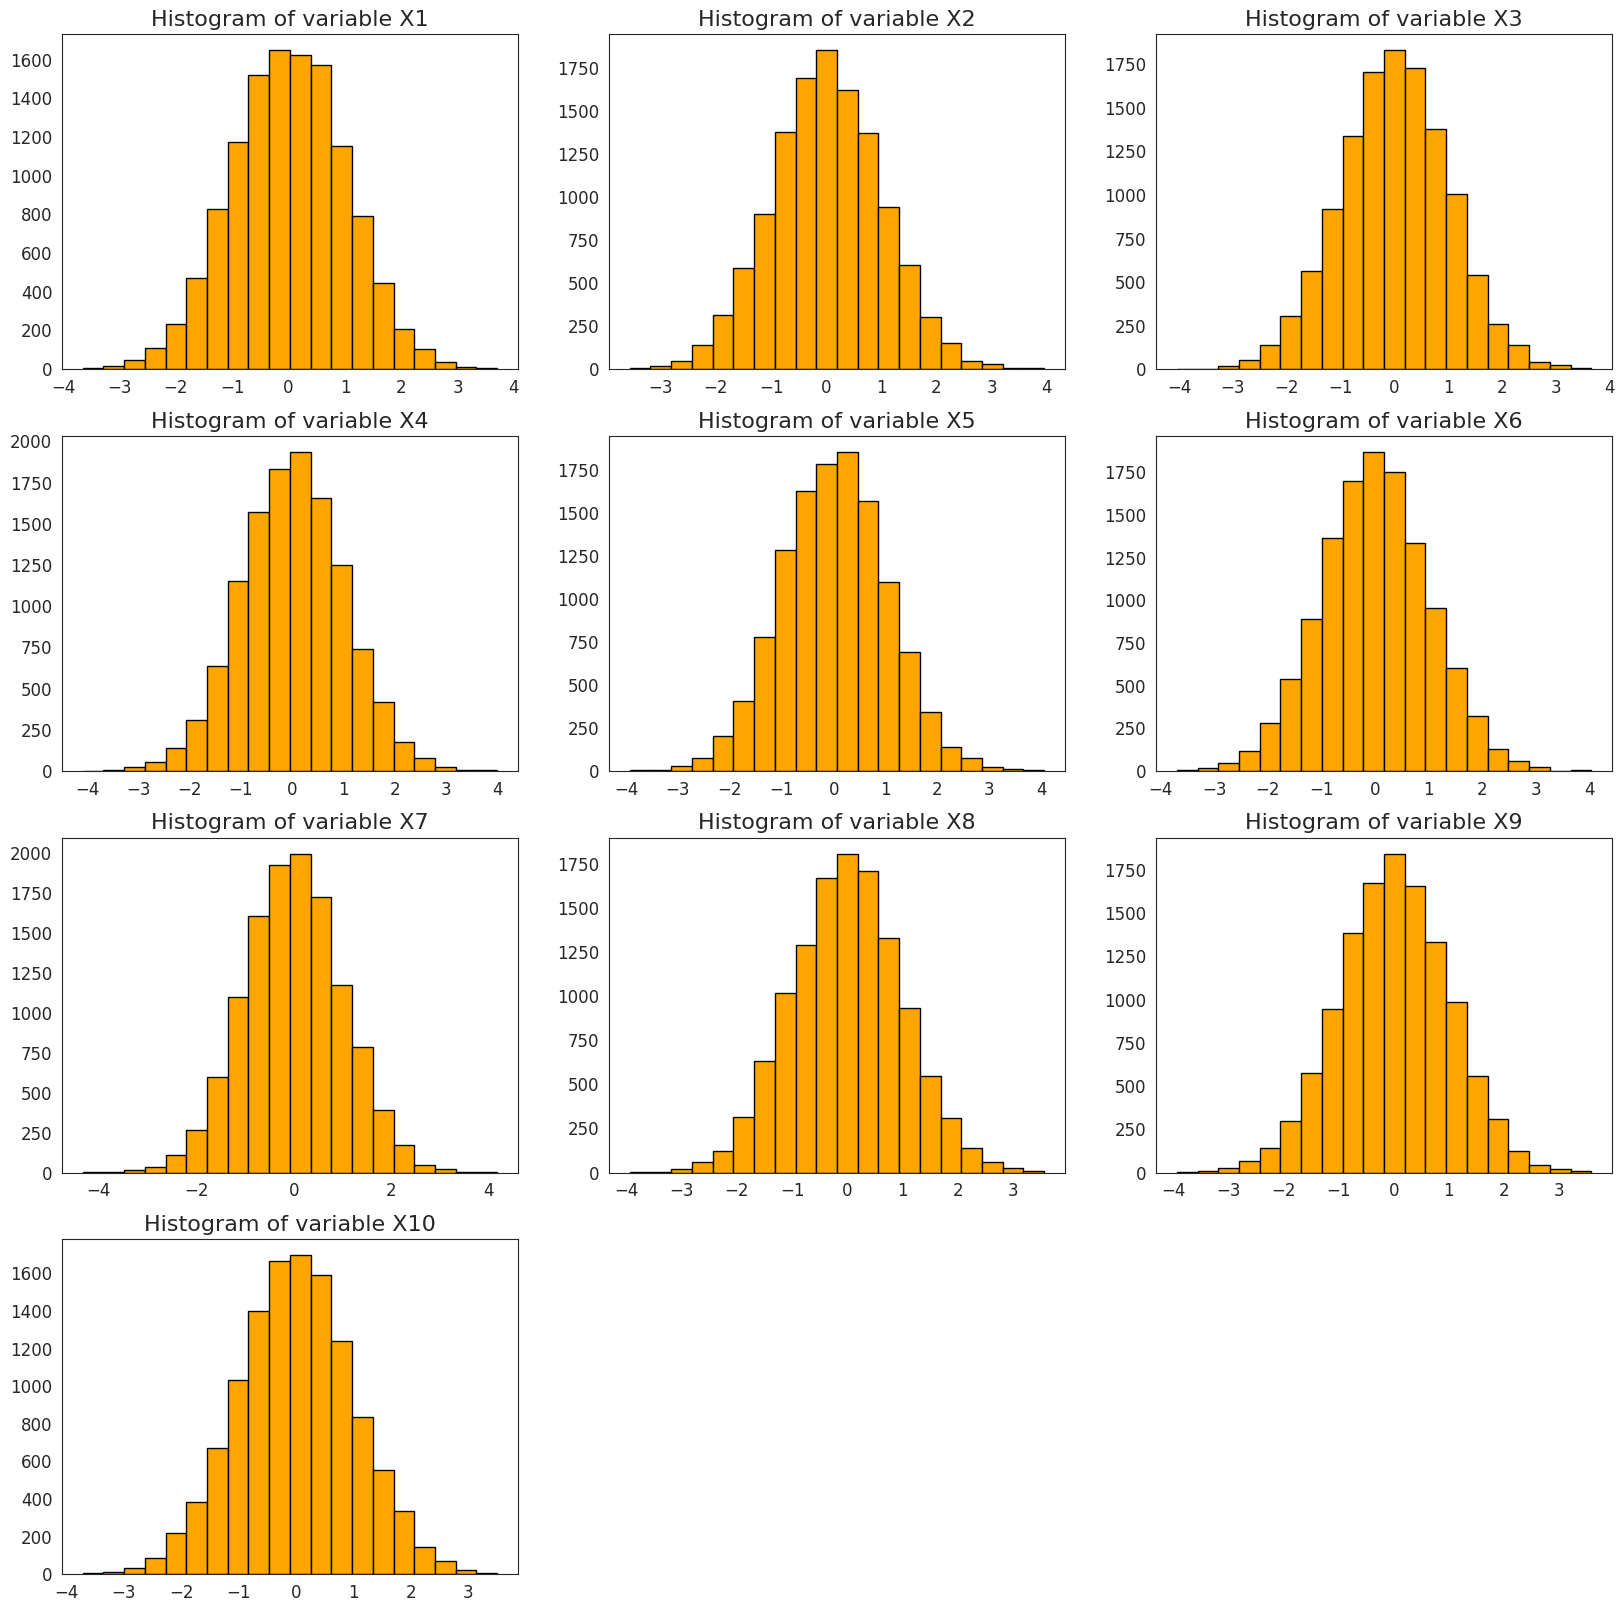

In [6]:
i=1
plt.figure(figsize=(20,20))
for c in df.columns[:-1]:
    plt.subplot(4,3,i)
    plt.title(f"Histogram of variable {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show()

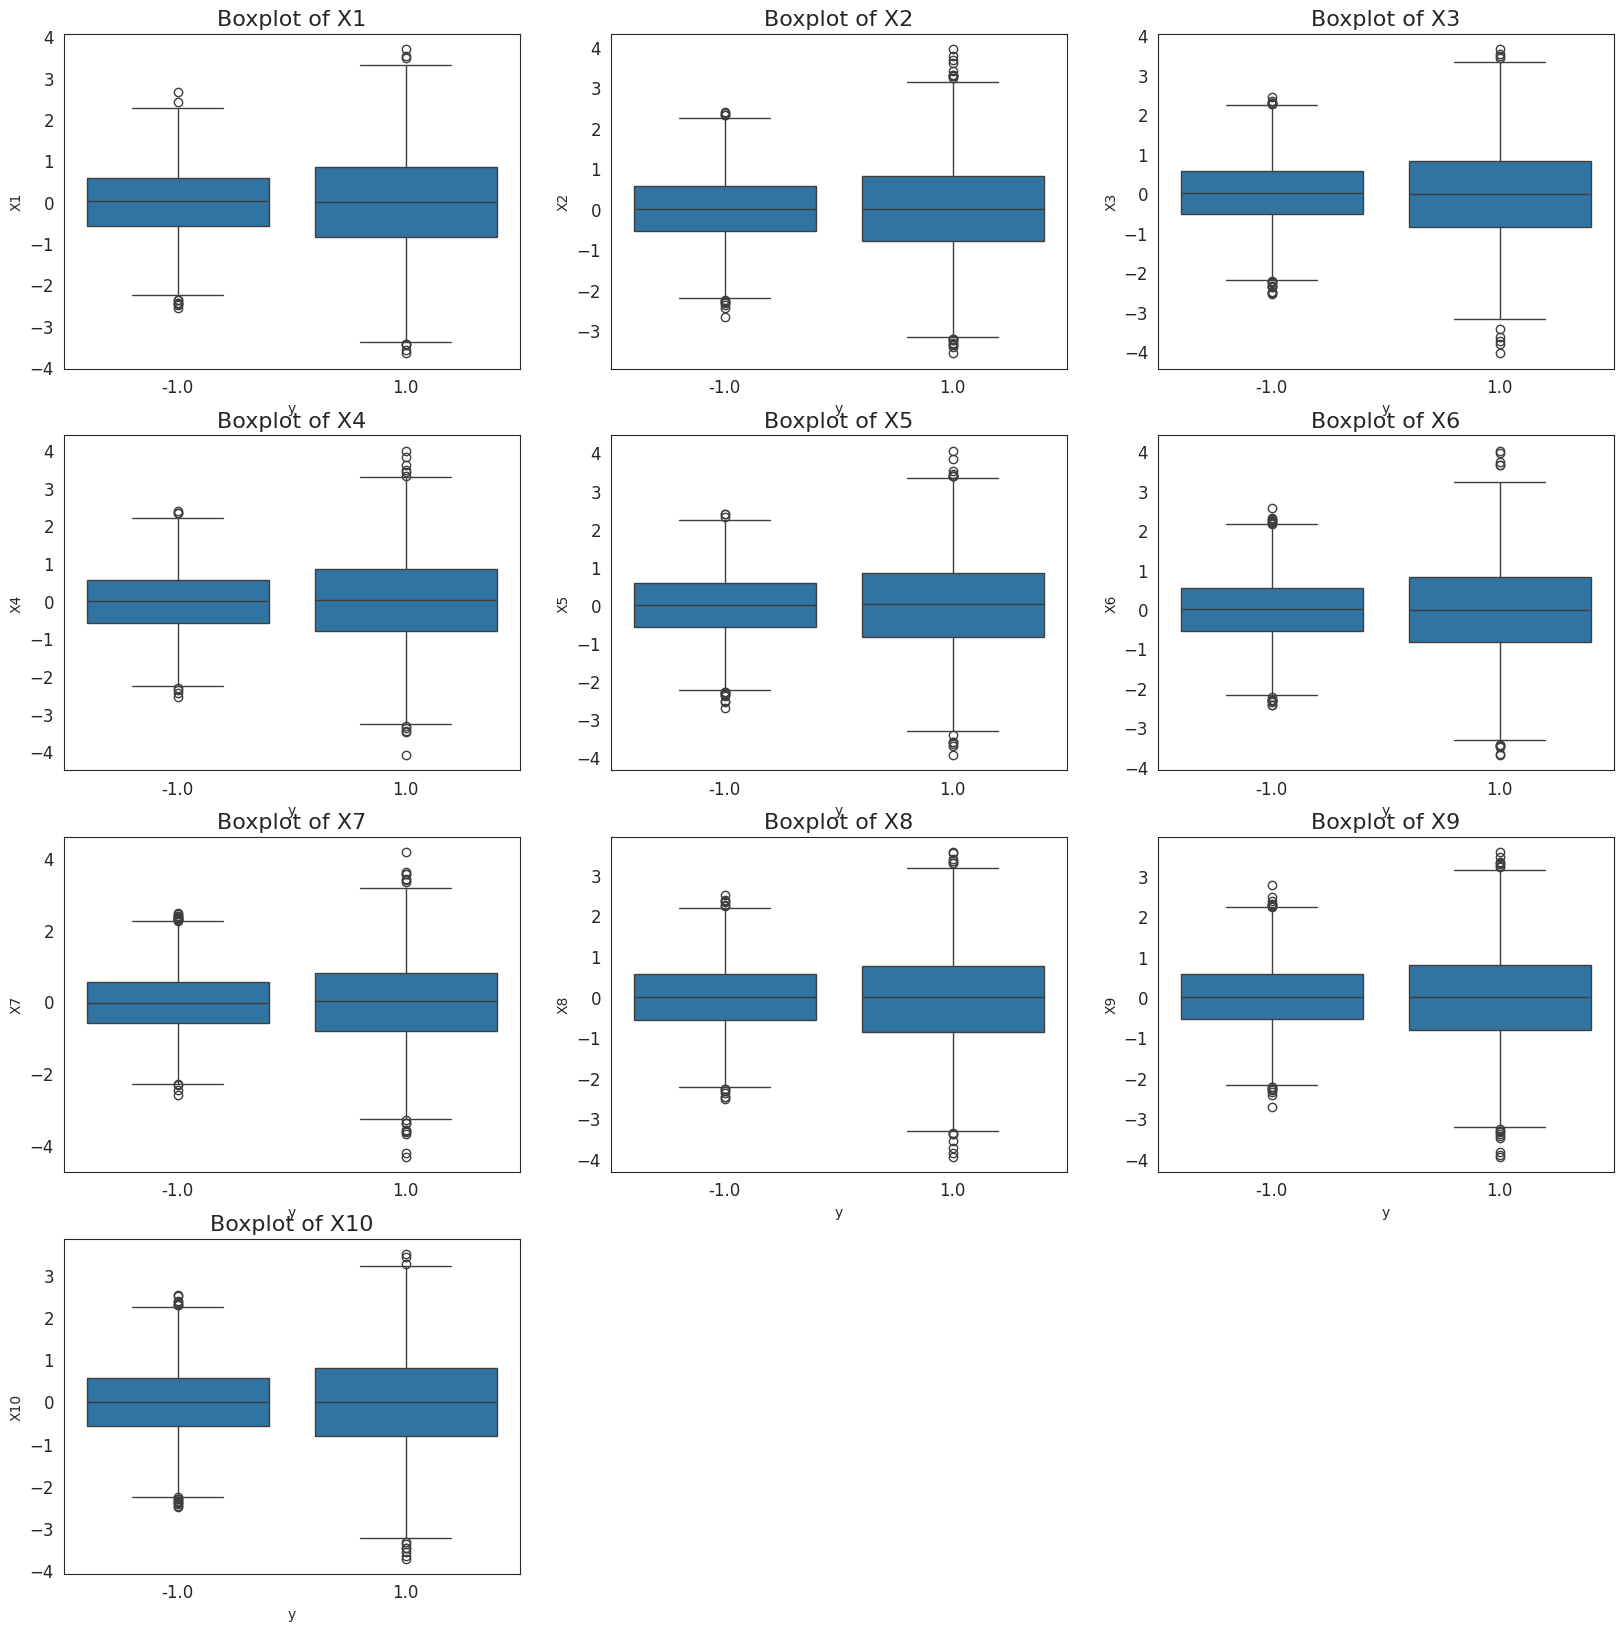

In [7]:
i=1
plt.figure(figsize=(20,20))
for c in df.columns[:-1]:
    plt.subplot(4,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['y'])
    i+=1
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


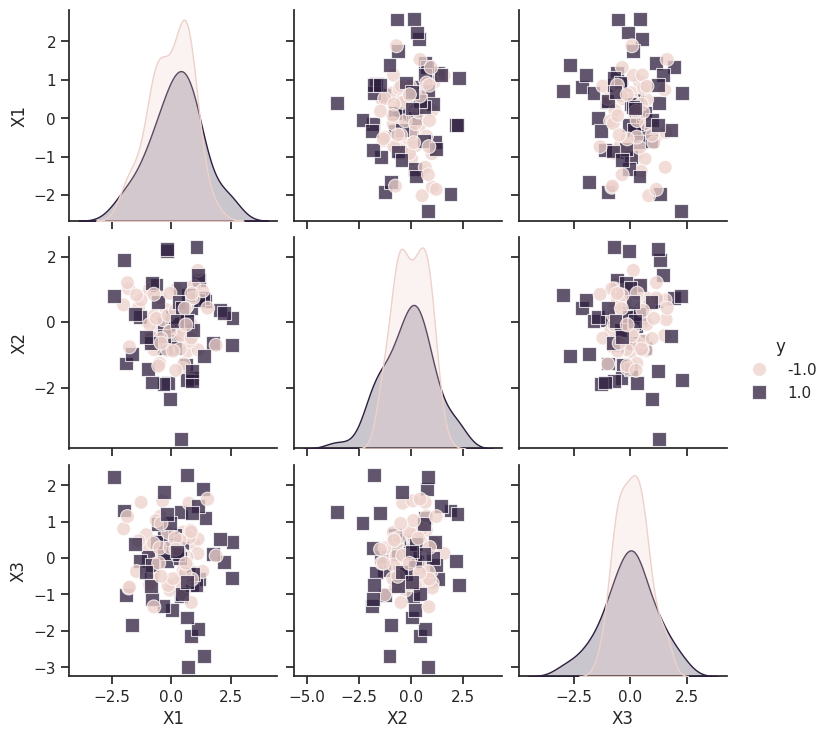

In [8]:
df_sample=df.sample(frac=0.01)
sns.set(style="ticks")
g=sns.pairplot(df_sample,vars=["X1","X2","X3"],
               hue="y",markers=["o", "s"],
               diag_kind="kde",diag_kws=dict(shade=True),plot_kws=dict(s=100,alpha=0.75))

## Test/train/validation split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop('y',axis=1)
y=df['y']

### First divide train and test data in 70:30 ratio

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Then further divide the test set in 50:50 ratio into validation set and test set

In [12]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)

In [13]:
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
7981,-1.091345,-0.298017,-0.092158,1.082816,0.675036,1.407571,-1.387545,-0.699427,-1.108341,2.448837
9406,-0.530384,-0.760544,-0.442309,-0.364458,0.548596,1.302132,1.031929,0.818745,-0.176466,-0.788832
5309,-0.127789,0.965298,-0.169047,-1.248953,0.779928,-0.380983,-0.911762,-1.108283,0.007115,2.596128
6561,1.375520,-0.407047,0.327626,-2.236206,-0.696330,-0.692610,0.608035,0.792993,-0.861884,-0.865285
5350,0.502111,1.036990,0.243904,-0.621619,0.209310,-0.120686,-2.063975,-0.439805,-0.502890,-1.813068


In [14]:
X_val.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
4020,-1.170339,-1.486993,-0.007831,-1.846242,-0.610258,0.796885,0.538208,0.836056,1.213428,1.499361
8282,0.610432,1.290162,1.226020,-0.899451,0.355583,-0.637806,0.317322,-1.787331,1.996915,0.456975
1084,1.111761,-0.543968,1.805916,0.194019,-0.880165,1.960757,-0.569821,-2.462306,1.955975,-0.388392
10171,-0.647577,-1.099500,1.989650,0.443153,1.195967,0.118358,-1.201501,3.045226,0.807686,-1.853016
6595,0.113207,0.289142,-0.350615,0.823948,-1.492682,0.700141,-0.843724,-1.744516,0.217074,0.030897


### Show the shape of these sets

In [15]:
print("Shape of validation set:", X_val.shape)
print("Shape of test set:", X_test.shape)
print("Shape of training set:", X_train.shape)

Shape of validation set: (1800, 10)
Shape of test set: (1800, 10)
Shape of training set: (8400, 10)


## Decision Tree model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5)

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

### Predictions and evaluation

In [19]:
predictions = dtree.predict(X_val)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [21]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.6911111111111111


### Varying hyperparameters

#### Varying *`max_depth`*

In [22]:
val_acc_max_depth=[]
val_f1_max_depth=[]
train_acc_max_depth=[]
train_f1_max_depth=[]
val_range=(1,81,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=1)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_max_depth.append(acc_train)
    train_f1_max_depth.append(f1_train)
    val_acc_max_depth.append(acc_val)
    val_f1_max_depth.append(f1_val)

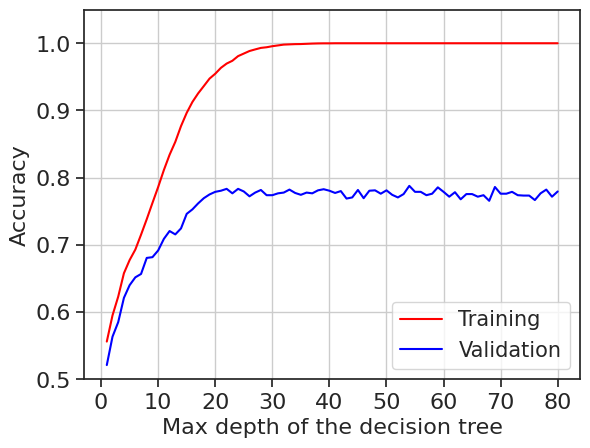

In [23]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_max_depth,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_max_depth,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Max depth of the decision tree", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,1.05)
plt.show()

#### Varying *`min_samples_leaf`* with *`max_depth`* = 20

In [24]:
val_acc_min_samples_leaf=[]
val_f1_min_samples_leaf=[]
train_acc_min_samples_leaf=[]
train_f1_min_samples_leaf=[]
val_range=(1,41,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=i)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_min_samples_leaf.append(acc_train)
    train_f1_min_samples_leaf.append(f1_train)
    val_acc_min_samples_leaf.append(acc_val)
    val_f1_min_samples_leaf.append(f1_val)

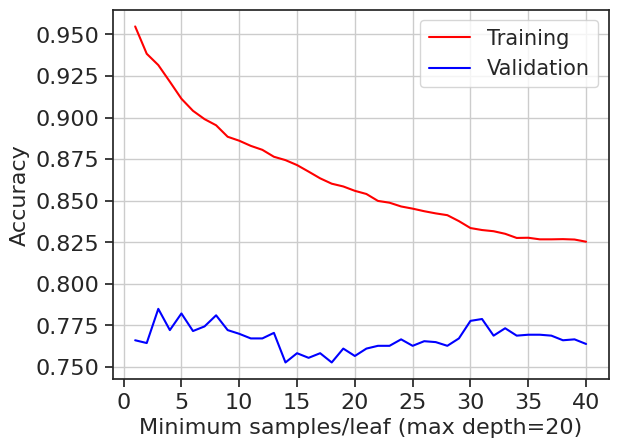

In [25]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_min_samples_leaf,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_min_samples_leaf,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Minimum samples/leaf (max depth=20)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.7,1.0)
plt.show()

### LEARNING CURVE: Varying training set size

In [26]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=5)
    # Sampling
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    # Fitting and Predictions
    dtree.fit(X_train_sampled,y_train_sampled)
    pred_train = dtree.predict(X_train_sampled)
    pred_val = dtree.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


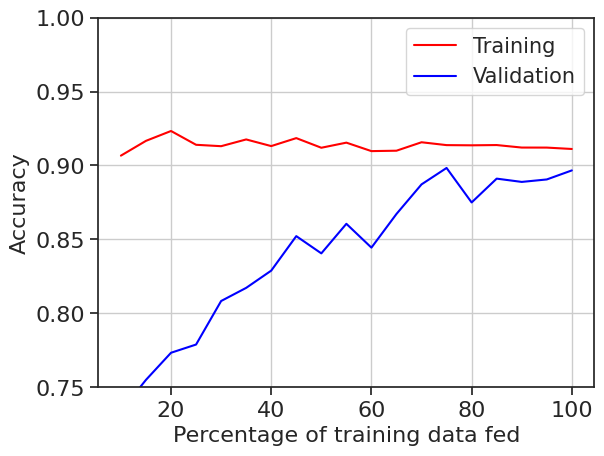

In [27]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.75,1.0)
plt.show()

## Boosting algorithm model
<p style="font-size:16px;font-family:cambria">
    We use the same <span style="font-family:consolas"><mark>AdaBoost</mark></span> classifier and observe markedly improved accuracy with the ensemble learner. We note that individual tree showed accuracy of about 70%, which can easily be classified as a ‘weak learner’. To drive this point home, we set the <span style="font-family:consolas"><mark>max_depth</mark></span> to only 2 and <span style="font-family:consolas"><mark>min_sample_leaf</mark></span> to 20 for the individual trees in the meta-learner i.e. <b>make the pruning aggressive</b>.

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=2,max_depth=3),
                            n_estimators=20,learning_rate=0.01)

In [30]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    min_samples_leaf=2),
                   learning_rate=0.01, n_estimators=20)

### Predictions and evaluation

In [31]:
predictions = adaboost.predict(X_val)

In [32]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.6655555555555556


### Varying number of estimators

In [33]:
import time
val_acc_num_trees=[]
val_f1_num_trees=[]
train_acc_num_trees=[]
train_f1_num_trees=[]
time_adaboost=[]
val_range=(1,152,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    # Fitting
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=2),
                            n_estimators=i,learning_rate=0.2)
    adaboost.fit(X_train,y_train)
    pred_train = adaboost.predict(X_train)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_num_trees.append(acc_train)
    train_f1_num_trees.append(f1_train)
    val_acc_num_trees.append(acc_val)
    val_f1_num_trees.append(f1_val)
    t2=time.time()
    time_adaboost.append(t2-t1)
    print(f"Done for number of trees: {i}")

Done for number of trees: 1
Done for number of trees: 6
Done for number of trees: 11
Done for number of trees: 16
Done for number of trees: 21
Done for number of trees: 26
Done for number of trees: 31
Done for number of trees: 36
Done for number of trees: 41
Done for number of trees: 46
Done for number of trees: 51
Done for number of trees: 56
Done for number of trees: 61
Done for number of trees: 66
Done for number of trees: 71
Done for number of trees: 76
Done for number of trees: 81
Done for number of trees: 86
Done for number of trees: 91
Done for number of trees: 96
Done for number of trees: 101
Done for number of trees: 106
Done for number of trees: 111
Done for number of trees: 116
Done for number of trees: 121
Done for number of trees: 126
Done for number of trees: 131
Done for number of trees: 136
Done for number of trees: 141
Done for number of trees: 146
Done for number of trees: 151


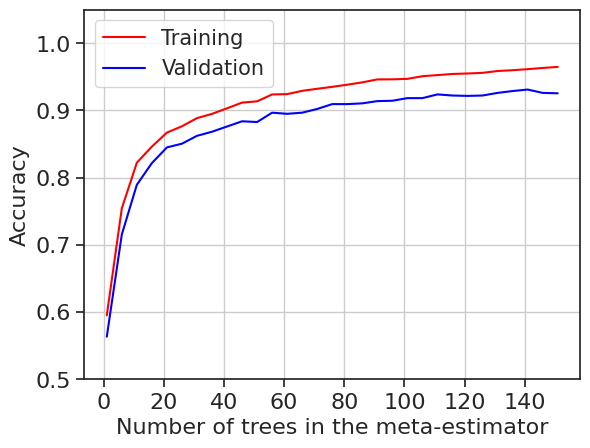

In [34]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_num_trees,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_num_trees,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of trees in the meta-estimator", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,1.05)
plt.show()

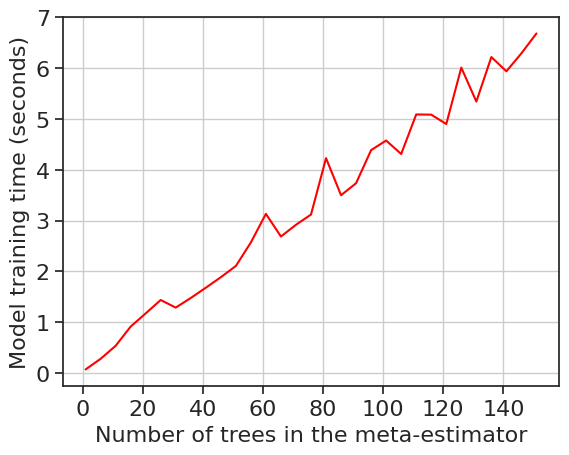

In [35]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),time_adaboost,c='red')
#plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_num_trees,c='blue')
#plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of trees in the meta-estimator", fontsize=16)
plt.ylabel("Model training time (seconds)",fontsize=16)
#plt.ylim(0.7,1.05)
plt.show()

### Tweaking the `learning_rate` of `AdaBoostClassifier`

In [36]:
val_acc_lr=[]
val_f1_lr=[]
train_acc_lr=[]
train_f1_lr=[]
val_range=(1,21,1)
lr_range=[]
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    lr=0.1*i
    lr_range.append(lr)
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=2),
                            n_estimators=100,learning_rate=lr)
    adaboost.fit(X_train,y_train)
    pred_train = adaboost.predict(X_train)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_lr.append(acc_train)
    train_f1_lr.append(f1_train)
    val_acc_lr.append(acc_val)
    val_f1_lr.append(f1_val)
    print(f"Done for learning rate: {lr}")

Done for learning rate: 0.1
Done for learning rate: 0.2
Done for learning rate: 0.30000000000000004
Done for learning rate: 0.4
Done for learning rate: 0.5
Done for learning rate: 0.6000000000000001
Done for learning rate: 0.7000000000000001
Done for learning rate: 0.8
Done for learning rate: 0.9
Done for learning rate: 1.0
Done for learning rate: 1.1
Done for learning rate: 1.2000000000000002
Done for learning rate: 1.3
Done for learning rate: 1.4000000000000001
Done for learning rate: 1.5
Done for learning rate: 1.6
Done for learning rate: 1.7000000000000002
Done for learning rate: 1.8
Done for learning rate: 1.9000000000000001
Done for learning rate: 2.0


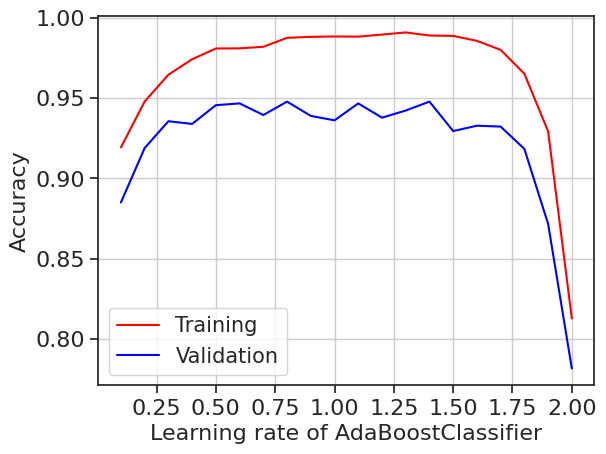

In [37]:
plt.plot(lr_range,train_acc_lr,c='red')
plt.plot(lr_range,val_acc_lr,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Learning rate of AdaBoostClassifier", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.7,1.05)
plt.show()

### LEARNING CURVE: Varying training set size

In [40]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Model
    percentage=i*0.01
    adaboost = adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=20,learning_rate=0.5)
    # Sampling
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    # Fitting and prediction
    adaboost.fit(X_train_sampled,y_train_sampled)
    pred_train = adaboost.predict(X_train_sampled)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)

    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


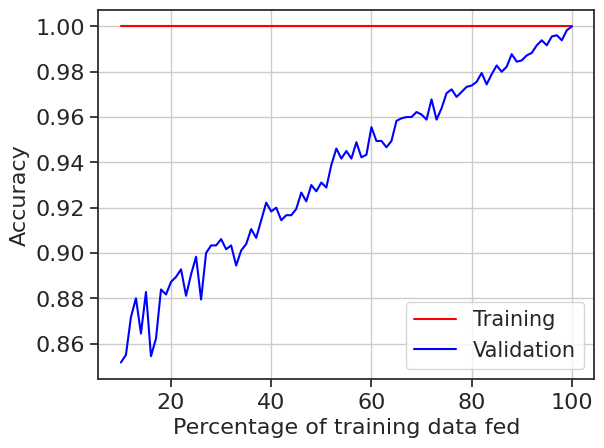

In [41]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.75,1.0)
plt.show()

## SVM model

### Scaling the data using `StandardScaler`

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X_train_scaled=StandardScaler().fit_transform(X_train)
X_val_scaled=StandardScaler().fit_transform(X_val)

In [44]:
from sklearn.svm import SVC

In [45]:
svc_clf=SVC(kernel="poly", C=1,degree=2)

In [46]:
svc_clf.fit(X_train_scaled,y_train)

SVC(C=1, degree=2, kernel='poly')

### Predictions and evaluation

In [47]:
predictions=svc_clf.predict(X_val_scaled)

In [48]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.9683333333333334


### Varying degree of polynomial kernel

In [49]:
val_acc_degree=[]
val_f1_degree=[]
train_acc_degree=[]
train_f1_degree=[]
val_range=(1,11,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    svc_clf=SVC(kernel="poly", C=0.01,degree=i)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_degree.append(acc_train)
    train_f1_degree.append(f1_train)
    val_acc_degree.append(acc_val)
    val_f1_degree.append(f1_val)
    print(f"Done for number of degree: {i}")

Done for number of degree: 1
Done for number of degree: 2
Done for number of degree: 3
Done for number of degree: 4
Done for number of degree: 5
Done for number of degree: 6
Done for number of degree: 7
Done for number of degree: 8
Done for number of degree: 9
Done for number of degree: 10


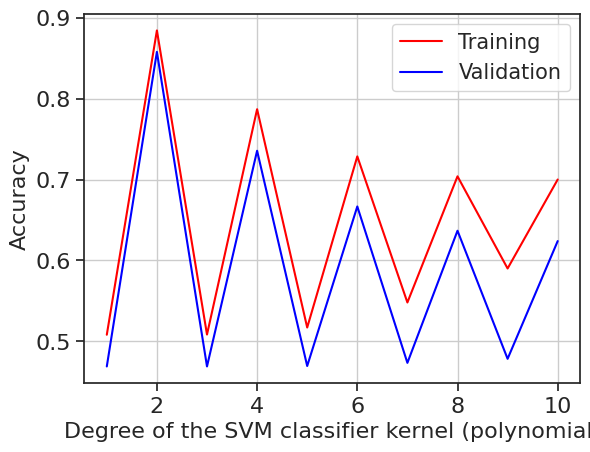

In [50]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_degree,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_degree,c='blue')
plt.grid(True)
plt.legend(["Training","Validation"],fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Degree of the SVM classifier kernel (polynomial)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.show()

#### But what if we put a penalty for misclassification? `C` = 10

In [51]:
val_acc_degree=[]
val_f1_degree=[]
train_acc_degree=[]
train_f1_degree=[]
val_range=(1,11,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    svc_clf=SVC(kernel="poly", C=10,degree=i)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_degree.append(acc_train)
    train_f1_degree.append(f1_train)
    val_acc_degree.append(acc_val)
    val_f1_degree.append(f1_val)
    print(f"Done for number of degree: {i}")

Done for number of degree: 1
Done for number of degree: 2
Done for number of degree: 3
Done for number of degree: 4
Done for number of degree: 5
Done for number of degree: 6
Done for number of degree: 7
Done for number of degree: 8
Done for number of degree: 9
Done for number of degree: 10


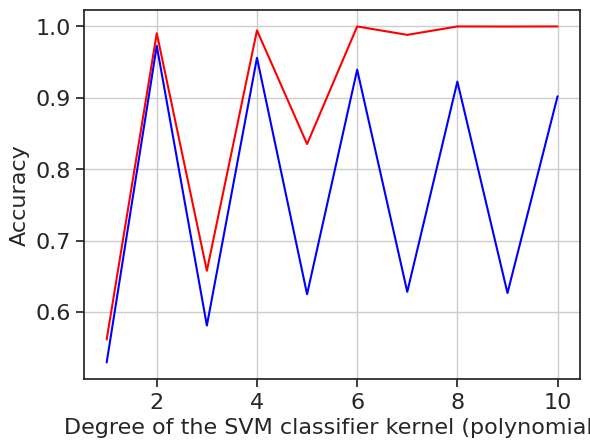

In [52]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_degree,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_degree,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Degree of the SVM classifier kernel (polynomial)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.show()

### Varying regularization parameter _C_ (i.e. $\frac{1}{\lambda}$ in the Lagrangian formulation of SVM)

In [53]:
val_acc_C=[]
val_f1_C=[]
train_acc_C=[]
train_f1_C=[]
C_range=[]
val_range=(-8,2,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    C=2**(i)
    C_range.append(C)
    # Fitting
    svc_clf=SVC(kernel="poly", C=C,degree=2)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_C.append(acc_train)
    train_f1_C.append(f1_train)
    val_acc_C.append(acc_val)
    val_f1_C.append(f1_val)
    print(f"Done for number of C: {2**(i)}")

Done for number of C: 0.00390625
Done for number of C: 0.0078125
Done for number of C: 0.015625
Done for number of C: 0.03125
Done for number of C: 0.0625
Done for number of C: 0.125
Done for number of C: 0.25
Done for number of C: 0.5
Done for number of C: 1
Done for number of C: 2


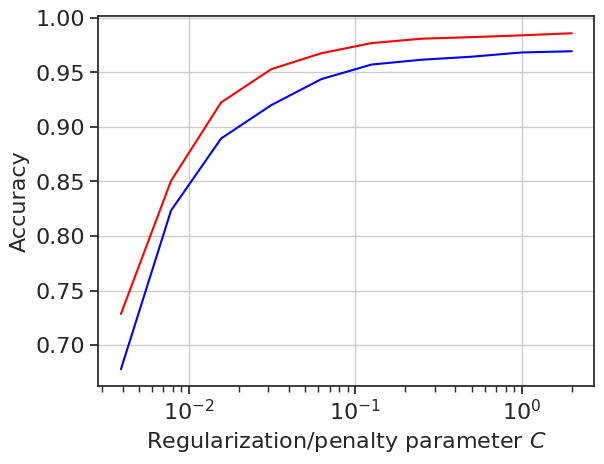

In [54]:
plt.semilogx(C_range,train_acc_C,c='red')
plt.semilogx(C_range,val_acc_C,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Regularization/penalty parameter $C$", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.81,0.85)
plt.show()

### Radial basis function (`RBF`) kernel - varying `gamma`

In [55]:
val_acc_gamma=[]
val_f1_gamma=[]
train_acc_gamma=[]
train_f1_gamma=[]
gamma_range=[]
val_range=(-25,10,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    gamma=10**(i/5.0)
    gamma_range.append(gamma)
    # Fitting9
    svc_clf=SVC(kernel="rbf", C=1,gamma=gamma)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_gamma.append(acc_train)
    train_f1_gamma.append(f1_train)
    val_acc_gamma.append(acc_val)
    val_f1_gamma.append(f1_val)
    print(f"Done for gamma: {gamma}")

Done for gamma: 1e-05
Done for gamma: 1.584893192461114e-05
Done for gamma: 2.5118864315095822e-05
Done for gamma: 3.9810717055349695e-05
Done for gamma: 6.309573444801929e-05
Done for gamma: 0.0001
Done for gamma: 0.00015848931924611142
Done for gamma: 0.00025118864315095795
Done for gamma: 0.00039810717055349735
Done for gamma: 0.000630957344480193
Done for gamma: 0.001
Done for gamma: 0.001584893192461114
Done for gamma: 0.0025118864315095794
Done for gamma: 0.003981071705534973
Done for gamma: 0.00630957344480193
Done for gamma: 0.01
Done for gamma: 0.015848931924611134
Done for gamma: 0.025118864315095794
Done for gamma: 0.039810717055349734
Done for gamma: 0.06309573444801933
Done for gamma: 0.1
Done for gamma: 0.15848931924611134
Done for gamma: 0.251188643150958
Done for gamma: 0.3981071705534972
Done for gamma: 0.6309573444801932
Done for gamma: 1.0
Done for gamma: 1.5848931924611136
Done for gamma: 2.51188643150958
Done for gamma: 3.9810717055349722
Done for gamma: 6.30957344

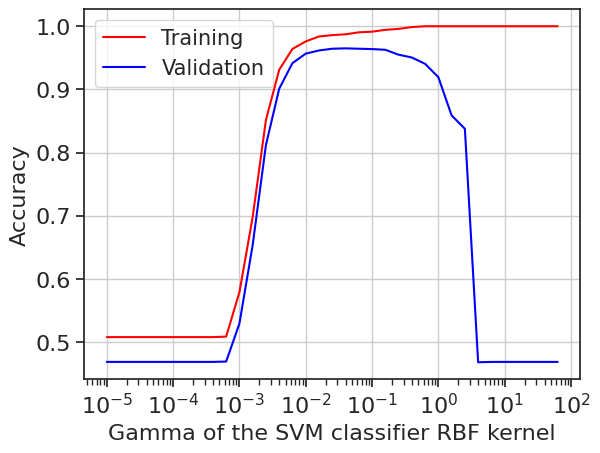

In [56]:
plt.semilogx(gamma_range,train_acc_gamma,c='red')
plt.semilogx(gamma_range,val_acc_gamma,c='blue')
plt.grid(True)
plt.legend(["Training","Validation"],fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Gamma of the SVM classifier RBF kernel", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.show()

### LEARNING CURVE: Varying training set size

In [57]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    svc_clf=SVC(kernel="rbf",C=1,gamma=0.01)
    # Sampling (and scaling)
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and prediction
    svc_clf.fit(X_train_sampled,y_train_sampled)
    pred_train = svc_clf.predict(X_train_sampled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)

    print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 15% training set size
Done for: 20% training set size
Done for: 25% training set size
Done for: 30% training set size
Done for: 35% training set size
Done for: 40% training set size
Done for: 45% training set size
Done for: 50% training set size
Done for: 55% training set size
Done for: 60% training set size
Done for: 65% training set size
Done for: 70% training set size
Done for: 75% training set size
Done for: 80% training set size
Done for: 85% training set size
Done for: 90% training set size
Done for: 95% training set size
Done for: 100% training set size


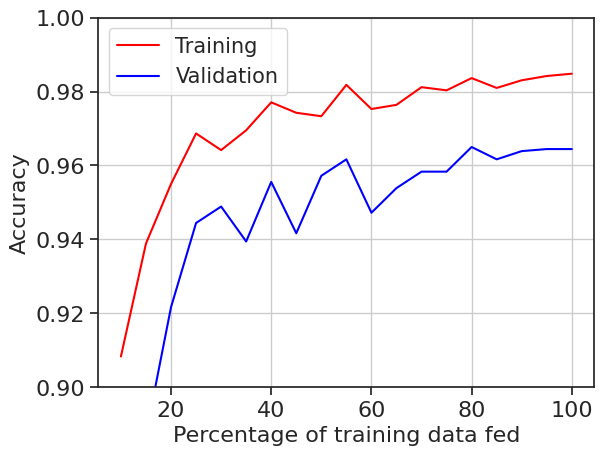

In [58]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.9,1.0)
plt.show()

## _K_-nearest neighbor model

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier(3)

In [61]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
predictions=knn.predict(X_val_scaled)

In [63]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.7022222222222222


### Varying number of neighbors

In [64]:
val_acc_k=[]
val_f1_k=[]
train_acc_k=[]
train_f1_k=[]
val_range=(1,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    knn=KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    pred_train = knn.predict(X_train_scaled)
    pred_val = knn.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_k.append(acc_train)
    train_f1_k.append(f1_train)
    val_acc_k.append(acc_val)
    val_f1_k.append(f1_val)
    print(f"Done for number of neighbors: {i}")

Done for number of neighbors: 1
Done for number of neighbors: 2
Done for number of neighbors: 3
Done for number of neighbors: 4
Done for number of neighbors: 5
Done for number of neighbors: 6
Done for number of neighbors: 7
Done for number of neighbors: 8
Done for number of neighbors: 9
Done for number of neighbors: 10
Done for number of neighbors: 11
Done for number of neighbors: 12
Done for number of neighbors: 13
Done for number of neighbors: 14
Done for number of neighbors: 15
Done for number of neighbors: 16
Done for number of neighbors: 17
Done for number of neighbors: 18
Done for number of neighbors: 19
Done for number of neighbors: 20


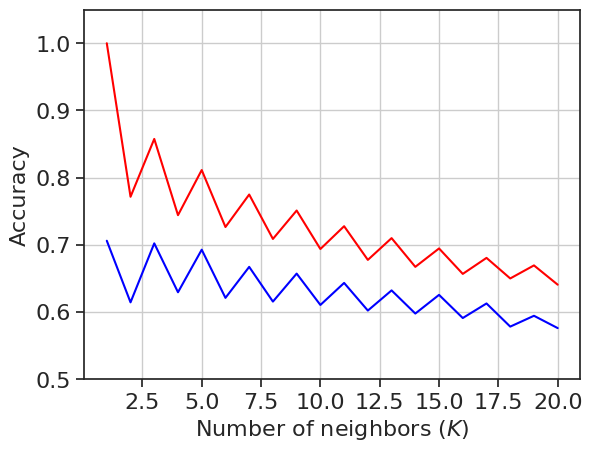

In [65]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_k,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_k,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neighbors ($K$)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,1.05)
plt.show()

### LEARNING CURVE: Varying training set size

In [66]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    knn=KNeighborsClassifier(10)
   # Sampling
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and prediction
    knn.fit(X_train_sampled,y_train_sampled)
    pred_train = knn.predict(X_train_sampled)
    pred_val = knn.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)

    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


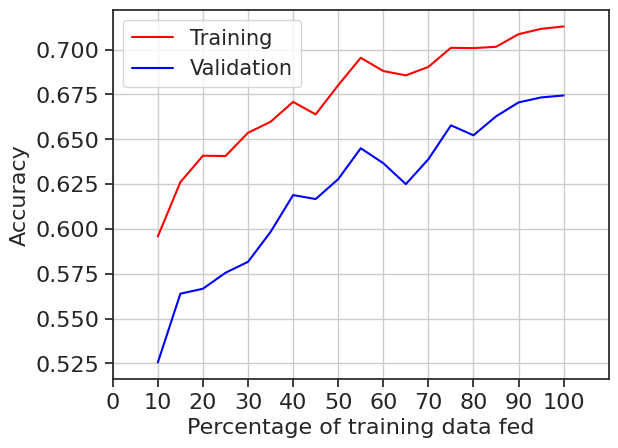

In [67]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.7,0.9)
plt.xlim(0,110)
plt.show()

## Neural Networks (Multi-layer perceptron)
<p style="font-size:16px;font-family:cambria">
MLP shows surprisingly poor performance for this dataset. We try many combinations of learning rate, architectures (layers and nodes), and optimizer choice but the accuracy never goes above 40-45%.

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [70]:
n_input=X_train_scaled.shape[0]
num_classes = len(y_train.unique())
input_dim=X_train_scaled.shape[1]

### Function to construct 2-hidden-layer Keras model

In [71]:
def make_NN_model(input_dim, num_classes, neuron_layer_1=20, neuron_layer_2=10, dropout_prob=0.25, \
                  activation_func='relu', learning_rate=0.01,optimizer='SGD'):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron_layer_2,activation=activation_func))
    #model.add(Dense(50,activation='relu'))
    model.add(Dropout(dropout_prob))
    # Softmax activation for the last layer for classification
    model.add(Dense(1, activation='sigmoid'))

    if optimizer=='SGD':
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
    if optimizer=='Adam':
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
    if optimizer=='RMSprop':
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

    return model

### Function to run the NN model

In [72]:
def run_NN(model,X_train,y_train,X_val,y_val,num_epochs=200,batch_size=16,plot_loss=False,verbosity=0):
    #save best model as checkpointer
    from keras.callbacks import ModelCheckpoint
    checkpointer = ModelCheckpoint(filepath='model.best.keras',
                                   verbose=verbosity, save_best_only=True)

    # train the model
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(X_val, y_val),
              verbose=verbosity, shuffle=False)

    if plot_loss:
        plt.plot(hist.history['accuracy'],color='red')
        plt.plot(hist.history['val_accuracy'],color='blue')
        plt.title("Training and validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()

    return hist

### Function to test the NN model

In [73]:
def test_NN(hist,X_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(X_test, y_test,verbose=0)[1]
    return score

### Basic run of the neural network (using Adam optimizer)

In [74]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.2,learning_rate=0.02,
                      neuron_layer_1=20,neuron_layer_2=10,optimizer='Adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0339 - loss: 0.3831 - val_accuracy: 0.0050 - val_loss: 0.1035
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0363 - loss: -0.6192 - val_accuracy: 0.0156 - val_loss: -2.7702
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0677 - loss: -8.9764 - val_accuracy: 0.0167 - val_loss: -19.5948
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0689 - loss: -53.6038 - val_accuracy: 0.0144 - val_loss: -76.6483
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0705 - loss: -174.5326 - val_accuracy: 0.0094 - val_loss: -199.3042
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0712 - loss: -382.8562 - val_accuracy: 0.0111 - val_loss: -394.8918
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0657 - loss: -767.3997 - val_accuracy: 0.0061 - val_loss: -707.5106
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0596 - loss: -1339

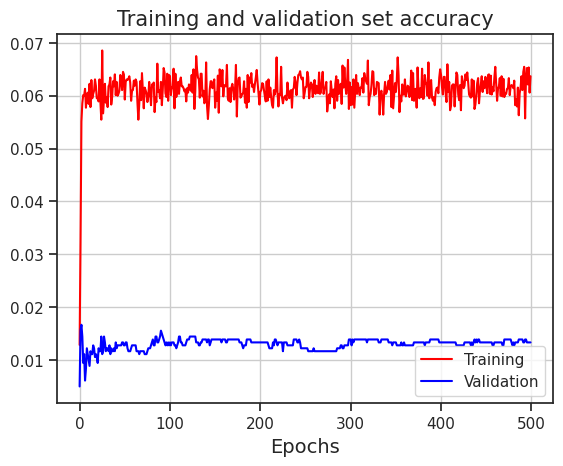

In [75]:
hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=500,plot_loss=True)

### Basic run of the neural network (using Stochastic Gradient Descent optimizer)

In [76]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.2,learning_rate=0.02,
                      neuron_layer_1=100,neuron_layer_2=50,optimizer='SGD')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1323 - loss: 0.6012 - val_accuracy: 0.0000e+00 - val_loss: 0.4902
Epoch 2/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0011 - loss: 0.4019 - val_accuracy: 0.0000e+00 - val_loss: 0.4333
Epoch 3/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.3212 - val_accuracy: 0.0000e+00 - val_loss: 0.4049
Epoch 4/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.2928 - val_accuracy: 0.0000e+00 - val_loss: 0.3793
Epoch 5/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.2521 - val_accuracy: 0.0000e+00 - val_loss: 0.3518
Epoch 6/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.2163 - val_accuracy: 0.0000e+00 - val_loss: 0.3195
Epoch 7/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1645 - val_accuracy: 0.0000e+00 - val_loss: 0.2859
Epoch 8/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - a

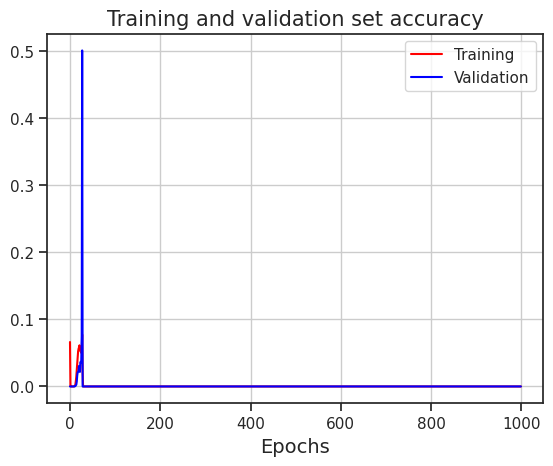

In [77]:
hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=1000,plot_loss=True)

### Varying hyperparameters

#### Number of neurons per layer

In [78]:
train_acc_n=[]
val_acc_n=[]

val_range=(10,200,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=0.02,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='SGD')
    hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=100,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 70


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 90


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 110


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 130


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 140


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 160


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 170


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 180


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for number of neurons (each hidden layer): 190


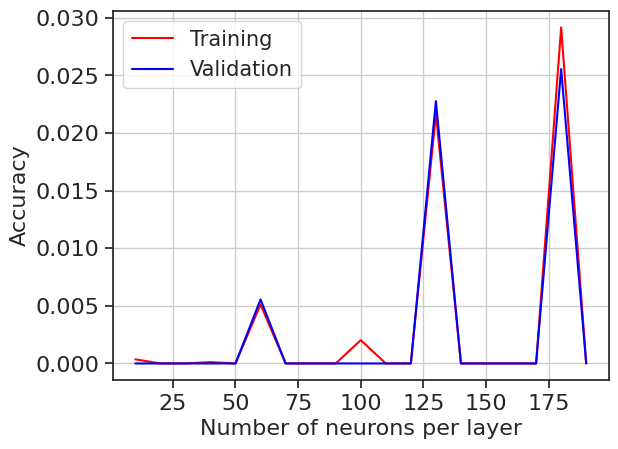

In [79]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

#### Learning rate

In [80]:
import time
train_acc_lr=[]
val_acc_lr=[]

val_range=(-40,-10,1)
lr_range=[]
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    lr=10**(i/10.0)
    lr_range.append(lr)
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=lr,
                      neuron_layer_1=100,neuron_layer_2=100,optimizer='SGD')
    hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=100,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_lr.append(acc_train)
    val_acc_lr.append(acc_val)
    t2=time.time()
    print(f"Done for learning rate: {lr}. Time took {round((t2-t1),2)} seconds")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.0001. Time took 30.31 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.00012589254117941674. Time took 29.36 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.00015848931924611142. Time took 28.72 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.00019952623149688788. Time took 28.1 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.00025118864315095795. Time took 29.62 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.00031622776601683794. Time took 28.98 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.00039810717055349735. Time took 46.91 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.0005011872336272725. Time took 42.12 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.000630957344480193. Time took 29.0 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.0007943282347242813. Time took 30.78 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.001. Time took 32.03 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.0012589254117941675. Time took 28.21 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.001584893192461114. Time took 29.37 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.001995262314968879. Time took 31.31 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.0025118864315095794. Time took 28.12 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.0031622776601683794. Time took 28.76 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.003981071705534973. Time took 30.25 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.005011872336272725. Time took 28.63 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.00630957344480193. Time took 27.96 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.007943282347242814. Time took 30.69 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.01. Time took 28.41 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.012589254117941675. Time took 29.6 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.015848931924611134. Time took 27.22 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.0199526231496888. Time took 29.66 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.025118864315095794. Time took 29.57 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.03162277660168379. Time took 27.7 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.039810717055349734. Time took 30.92 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.05011872336272722. Time took 29.34 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.06309573444801933. Time took 32.01 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for learning rate: 0.07943282347242814. Time took 29.63 seconds


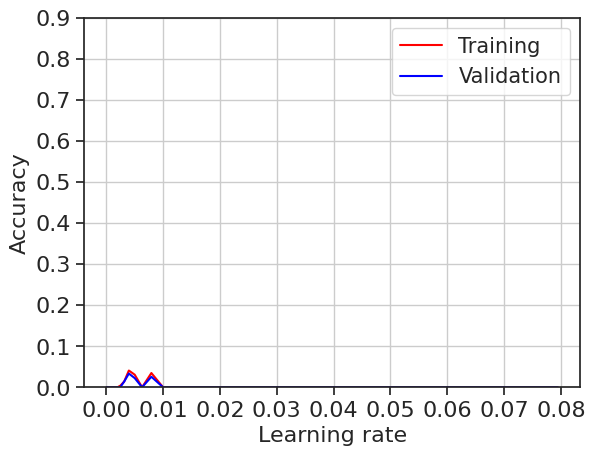

In [81]:
plt.plot(lr_range,train_acc_lr,c='red')
plt.plot(lr_range,val_acc_lr,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Learning rate", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.0,0.9)
plt.show()

### How to improve neural network performance?

In [82]:
model = Sequential()
model.add(Dense(100, input_shape=(input_dim,),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
# sigmoid activation for the last layer for classification
model.add(Dense(1, activation='sigmoid'))

#Optimizer
optimizer=keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_153 (Dense)                    │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_102 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_103 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_104 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,301 (63.68 KB)

 Trainable params: 16,301 (63.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0491 - loss: 0.2001 - val_accuracy: 0.0961 - val_loss: -5.7553
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0965 - loss: -90.1984 - val_accuracy: 0.0756 - val_loss: -868.1407
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0913 - loss: -3162.0454 - val_accuracy: 0.0800 - val_loss: -12522.7168
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1004 - loss: -28420.2930 - val_accuracy: 0.0611 - val_loss: -70708.8828
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0927 - loss: -129924.8203 - val_accuracy: 0.0589 - val_loss: -243169.6719
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0888 - loss: -408333.9375 - val_accuracy: 0.0661 - val_loss: -642844.6875
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0943 - loss: -1002159.3750 - val_accuracy: 0.0594 - val_loss: -1393350.8750
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/s

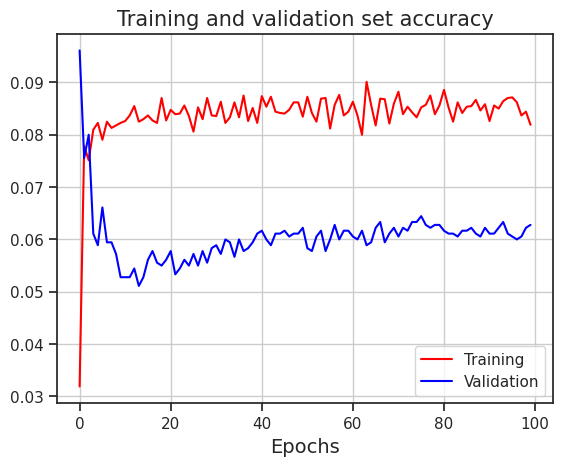

In [84]:
hist=run_NN(model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=100,plot_loss=True)

### LEARNING CURVE: Varying training set size

In [85]:
import time
val_acc_train_size=[]
train_acc_train_size=[]

val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    percentage=i*0.01
    # Sampling
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.05,
                      neuron_layer_1=100,neuron_layer_2=100,optimizer='SGD')
    hist=run_NN(nn_model,X_train_sampled,y_train_sampled,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=100,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)

    t2=time.time()
    print(f"Done for: {i}% training set size. Took {round((t2-t1),2)} seconds.")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 10% training set size. Took 16.14 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 15% training set size. Took 15.03 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 20% training set size. Took 15.96 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 25% training set size. Took 15.34 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 30% training set size. Took 18.21 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 35% training set size. Took 15.69 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 40% training set size. Took 16.61 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 45% training set size. Took 18.64 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 50% training set size. Took 16.81 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 55% training set size. Took 18.83 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 60% training set size. Took 17.69 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 65% training set size. Took 23.6 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 70% training set size. Took 22.19 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 75% training set size. Took 27.13 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 80% training set size. Took 29.81 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 85% training set size. Took 30.93 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 90% training set size. Took 28.48 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 95% training set size. Took 31.07 seconds.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 100% training set size. Took 32.44 seconds.


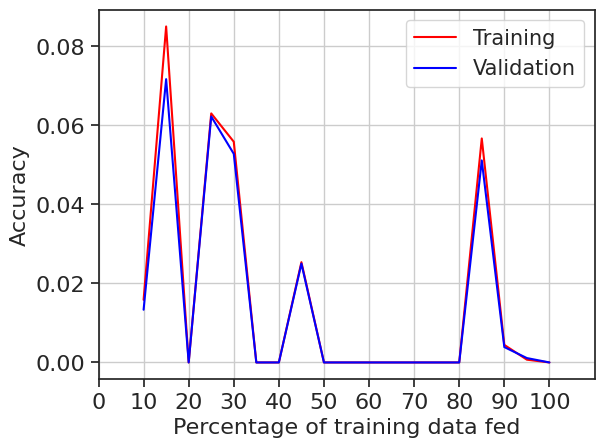

In [86]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.xlim(0,110)
plt.show()

## At the end, comparison of performance (accuracy) on test set and wall time

In [87]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=10)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
score_dt=accuracy_score(y_test,predictions)
print(score_dt)

0.7838888888888889
CPU times: user 243 ms, sys: 0 ns, total: 243 ms
Wall time: 245 ms


In [88]:
%%time
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=2),
                            n_estimators=80,learning_rate=0.5)
adaboost.fit(X_train,y_train)
predictions = adaboost.predict(X_test)
score_adaboost=accuracy_score(y_test,predictions)
print(score_adaboost)

0.9366666666666666
CPU times: user 3.25 s, sys: 8.8 ms, total: 3.26 s
Wall time: 3.26 s


In [89]:
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)

In [90]:
%%time
from sklearn.svm import SVC
svc_clf=SVC(kernel="rbf", C=1,gamma=0.05)
svc_clf.fit(X_train_scaled,y_train)
predictions = svc_clf.predict(X_test_scaled)
score_SVC=accuracy_score(y_test,predictions)
print(score_SVC)

0.9772222222222222
CPU times: user 851 ms, sys: 14.9 ms, total: 866 ms
Wall time: 870 ms


In [91]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(5)
knn.fit(X_train_scaled,y_train)
predictions = knn.predict(X_test_scaled)
score_KNN=accuracy_score(y_test,predictions)
print(score_KNN)

0.7277777777777777
CPU times: user 563 ms, sys: 1.81 ms, total: 564 ms
Wall time: 592 ms


In [92]:
accuracy_scores = [0.79, 0.93, 0.97, 0.69, 0.45]
timing = [0.23, 2.72, 2.27, 0.667, 3.5]

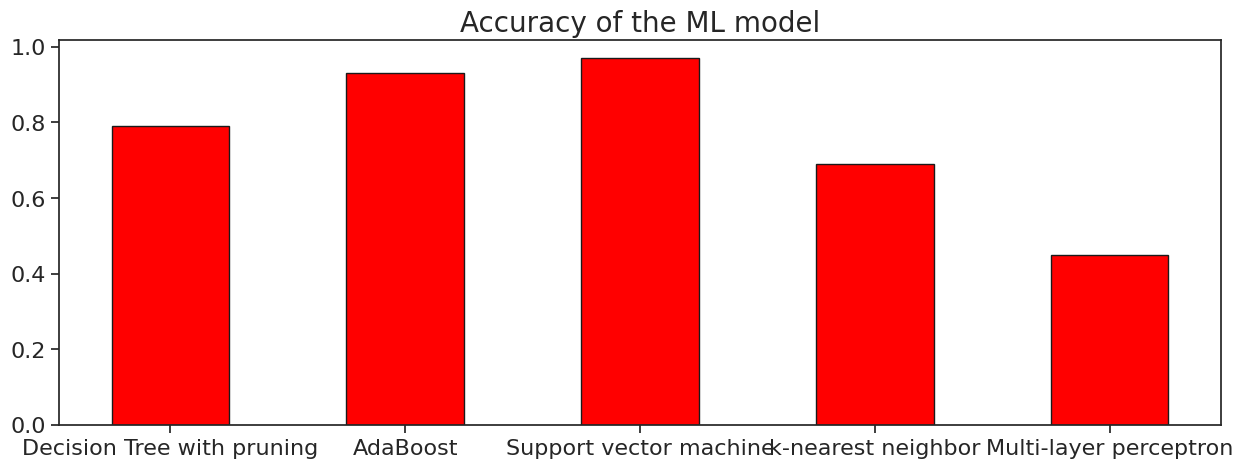

In [93]:
plt.figure(figsize=(15,5))
plt.title("Accuracy of the ML model",fontsize=20)
plt.bar(x=['Decision Tree with pruning','AdaBoost','Support vector machine','k-nearest neighbor','Multi-layer perceptron'],
        height=accuracy_scores,width=0.5,color='red',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

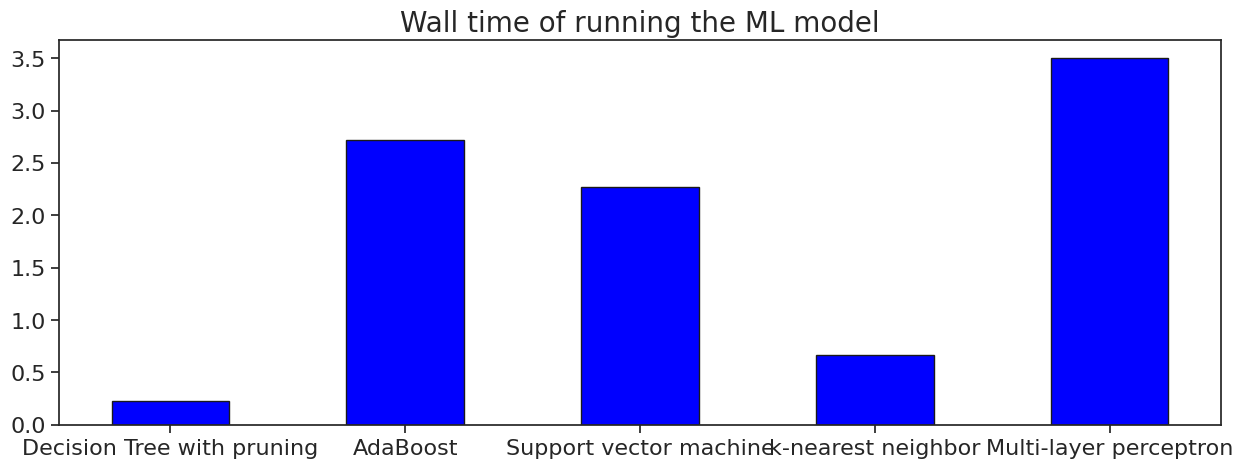

In [94]:
plt.figure(figsize=(15,5))
plt.title("Wall time of running the ML model",fontsize=20)
plt.bar(x=['Decision Tree with pruning','AdaBoost','Support vector machine','k-nearest neighbor','Multi-layer perceptron'],
        height=timing,width=0.5,color='blue',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()